## inicio

In [157]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [158]:
file_string = "./imagens/documentos/cursivo_skeletonize_imagej.png"
gmap = plt.cm.gray
line_dir = "./imagens/linhas/"
word_dir = "./imagens/palavras/"
if not os.path.exists(line_dir):
    os.mkdir(line_dir)
if not os.path.exists(word_dir):
    os.mkdir(word_dir)

## Definindo funcoes

In [159]:
def find_words(img):
    h,w = img.shape
    
    inicial = 0
    final = 0
    palavras = []
    empty_line_count = 0

    max_empty_lines = 4
    min_gap_size = 5


    for x in range(0, w):
        sum = 0
        for y in range(0,h):
            sum += img[y][x]
        col_avg = sum/h
        line_is_empty = col_avg == 255
        
        if line_is_empty:
                empty_line_count+=1

                if empty_line_count == max_empty_lines:
                    final = x
                    gap_size = final - inicial
                    
                    if gap_size > min_gap_size:
                        palavras.append(img[:, inicial:final])

                elif empty_line_count>4:
                    if col_avg == 255:
                        empty_line_count = 0
                    inicial = final
    return palavras


In [160]:
def find_lines(img):
    h, w = img.shape
    i=0
    start = 0
    end = 0
    lines=[]

    for y in range(0, h):
        sum = 0
        for x in range(0,w):
            sum += img[y][x]
        line_avg = sum/w
        if line_avg == 255:
            i+=1

            if i == 4:
                end = y

                if end - start > 15:
                    n = lines.append(img[start:end, ])
                    #print(start, end)

                start = end
            
            elif i>4:
                if line_avg == 255:
                    i = 0
        
    return lines

In [161]:
def save_results(array, dir, name:str = ""):
    i=0
    for img in array:
        cv.imwrite(f"{dir}{name+str(i)}.png", img)
        i+=1

### testes

In [162]:
def hor_density(img,h:int,w:int,min_h : int = 0,min_w : int = 0):
    most = 0
    least = 255
    avg_img = 0

    for y in range(min_h, h):
        sum = 0
        for x in range(min_w,w):
            sum += img[y][x]
        
        avg_line = sum/(w-min_w)
        avg_img += avg_line

        if avg_line > most:
            most = avg_line
        elif avg_line < least:
            least = avg_line
    
    avg_img = avg_img/(h-min_h)
    
    return avg_img, most, least

In [163]:
def ver_density(img,h:int,w:int,min_h : int = 0,min_w : int = 0):
    most = 0
    least = 255
    avg_img = 0

    for x in range(min_w, w):
        sum = 0
        for y in range(min_h, h):
            sum += img[y][x]
        
        avg_col = sum/(h-min_h)
        avg_img += avg_col

        if avg_col > most:
            most = avg_col
        elif avg_col < least:
            least = avg_col
    
    avg_img = avg_img/(w-min_w)
    
    return avg_img, most, least

## imagem inicial

In [164]:
def initial(file:str):
    img = cv.imread(file)
    img_inverted = cv.bitwise_not(img)
    img_gs = cv.cvtColor(img_inverted, cv.COLOR_RGB2GRAY)
    _, img_otsu = cv.threshold(img_gs, 128, 255, cv.THRESH_OTSU)
    #https://matplotlib.org/stable/users/explain/colors/colormaps.html

    return img_otsu, img_otsu.shape[0], img_otsu.shape[1]

481 1914


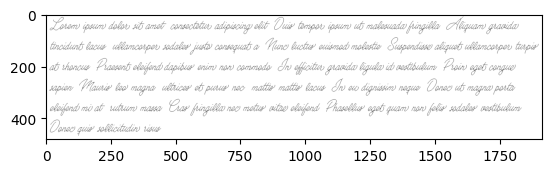

In [165]:
img, h, w = initial(file_string)
print(h, w)
plt.imshow(img, cmap = gmap)

## Main

In [166]:
lines = find_lines(img)

In [167]:
i=0
for line in lines:
    words = find_words(line)
    save_results(words, word_dir, f"palavra-{i}-")
    i+=1

## Tests


In [168]:
word = lines[0]
ctrl = 0
w, h = word.shape
for x in range(h-1):
    for y in range(w-1):
        if word[y+1][x] == 0:
            ctrl = 1
            break
        if y == h-10 and ctrl == 1:
            print("chegou no final")